In [148]:
## Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8) # Adjusts the configuration of the pliots we will create


In [149]:
## Read in the data

Bucket = 'pab10/datas'
Data_key = 'movies.csv'
data_location = 's3://{}/{}'.format(Bucket, Data_key)

In [150]:
df = pd.read_csv(data_location)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [152]:
## Missing data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [153]:
df[df.isna().any(axis=1)]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [154]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [155]:
## I need to fill out the missing values
## Rating: mode
df[['rating']].value_counts()

rating   
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
dtype: int64

In [156]:
df['rating'] = df['rating'].fillna(df['rating'].value_counts().idxmax())


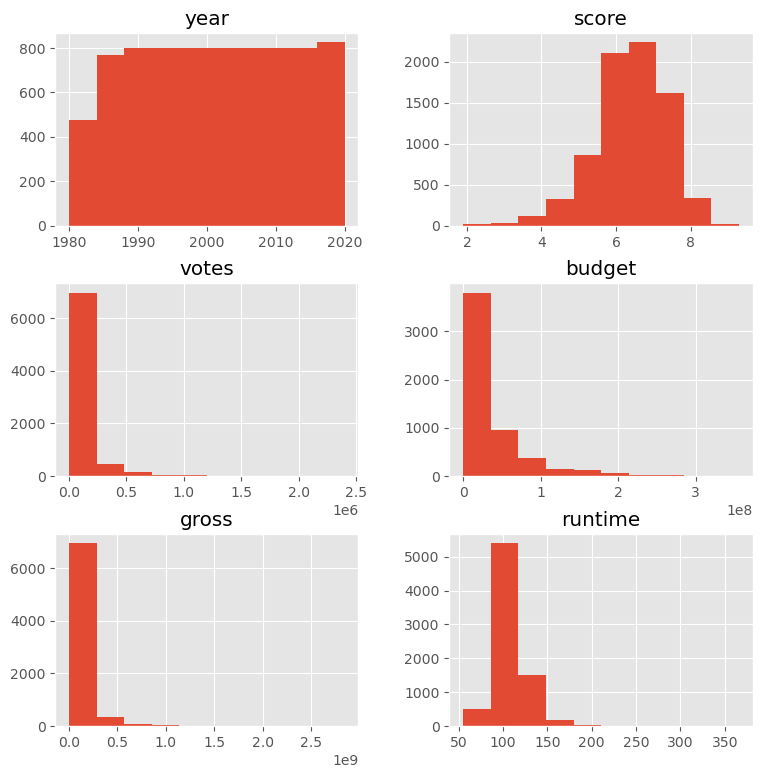

In [157]:
## Budget and gross
df.hist(bins= 10, figsize= (9,9))
plt.show()

In [158]:
x = df.query("budget.isna()")
x['country'].value_counts()

United States                     1099
United Kingdom                     321
France                             174
Canada                              77
India                               53
Australia                           50
Japan                               49
Italy                               42
Germany                             35
Spain                               29
Ireland                             22
South Korea                         22
Denmark                             21
Hong Kong                           20
Sweden                              20
China                               14
Mexico                              10
Norway                               9
Netherlands                          8
West Germany                         8
New Zealand                          7
Iran                                 7
Switzerland                          6
Thailand                             5
Hungary                              5
Poland                   

In [159]:
df['budget'] = df['budget'].fillna(df.groupby('country')['budget'].transform('median'))


In [160]:
df['budget'].fillna(df['budget'].mean(), inplace=True)

In [161]:
df['gross'] = df['gross'].fillna(df.groupby('country')['gross'].transform('median'))


In [162]:
df['gross'].fillna(df['gross'].mean(), inplace=True)

In [163]:
##Country
df['country'] = df['country'].fillna(df['country'].value_counts().idxmax())

In [164]:
##Company
df[['company']].value_counts()

company              
Universal Pictures       377
Warner Bros.             334
Columbia Pictures        332
Paramount Pictures       320
Twentieth Century Fox    240
                        ... 
El Mar Pictures            1
El Camino Pictures         1
Eikon Film                 1
Egoli Tossell KLK          1
thefyzz                    1
Length: 2385, dtype: int64

In [165]:
df['company'] = df['company'].fillna(df['company'].value_counts().idxmax())


In [166]:
##Runtime
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

In [167]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    2
score       3
votes       3
director    0
writer      3
star        1
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [168]:
## Change some data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 898.7+ KB


In [170]:
##Duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,26412163,Universal Pictures,90.000000
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,22000000,26412163,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,26412163,Embi Productions,107.261613
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,26412163,Universal Pictures,120.000000


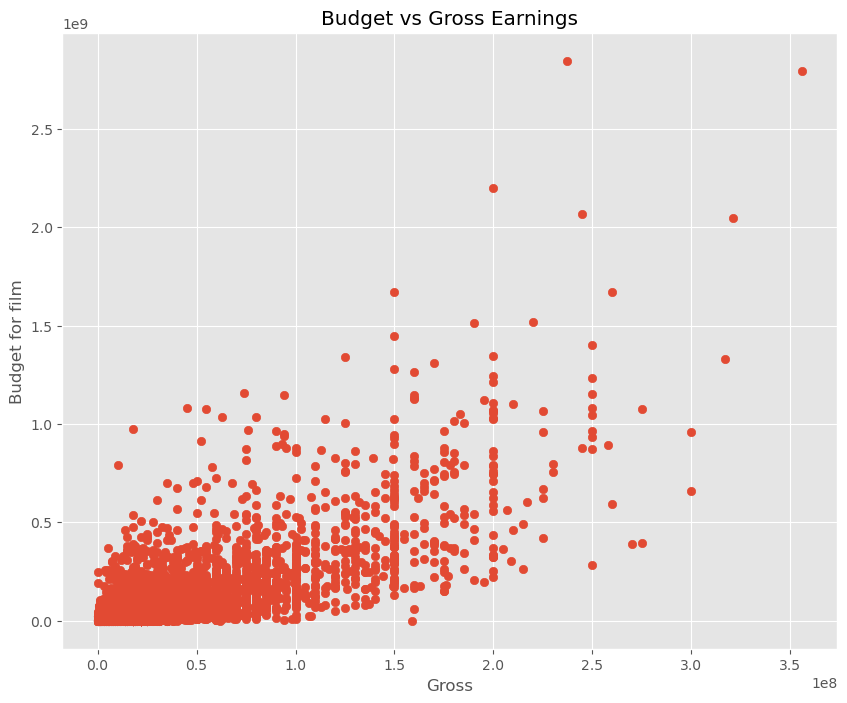

In [171]:
## Correlation with Gross: Budget, company

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross')
plt.ylabel('Budget for film')
plt.show()


<AxesSubplot: xlabel='budget', ylabel='gross'>

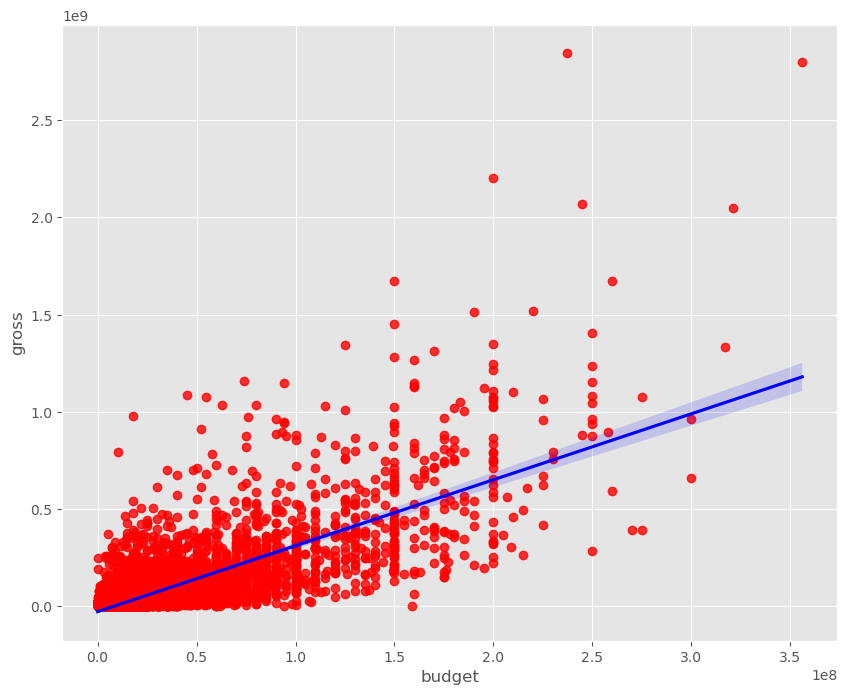

In [172]:
# PLot budget vs Gros using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [173]:
df.corr(method='pearson') # pearson, kendall, spearman

/tmp/ipykernel_10717/4263759918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.286476,0.259683,0.120766
score,0.097995,1.000000,0.409182,0.052235,0.185119,0.399378
votes,0.222945,0.409182,1.000000,0.458777,0.632123,0.309204
budget,0.286476,0.052235,0.458777,1.000000,0.744858,0.262437
gross,0.259683,0.185119,0.632123,0.744858,1.000000,0.244417
runtime,0.120766,0.399378,0.309204,0.262437,0.244417,1.000000


## High correlation between budget and gross

In [174]:
correlation_matrix = df.corr(method='pearson')

/tmp/ipykernel_10717/3303149751.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


/tmp/ipykernel_10717/3704783257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method='pearson')


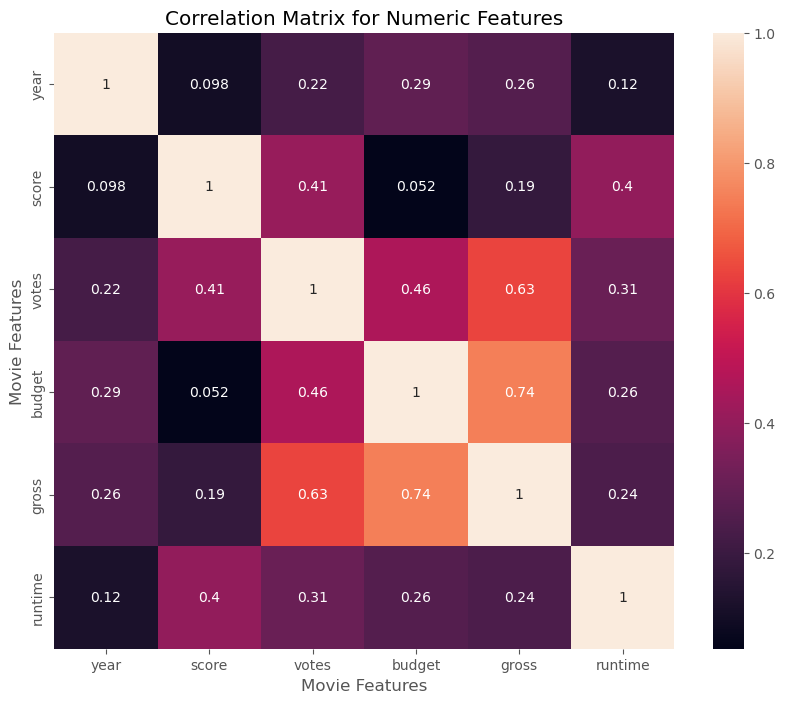

In [175]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [176]:
df_numerised == df

for col in df_numerised.columns:
    if(df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category')
        df_numerised[col] = df_numerised[col].cat.codes
        
df_numerised

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.000000
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.000000
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.000000
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.000000
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,26412163,2281,90.000000
7664,1678,6,4,2020,1107,4.7,36.0,774,2614,1886,55,22000000,26412163,539,90.000000
7665,4717,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,26412163,941,107.261613
7666,2843,6,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,26412163,2281,120.000000


In [177]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,26412163,Universal Pictures,90.000000
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,22000000,26412163,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,26412163,Embi Productions,107.261613
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,26412163,Universal Pictures,120.000000


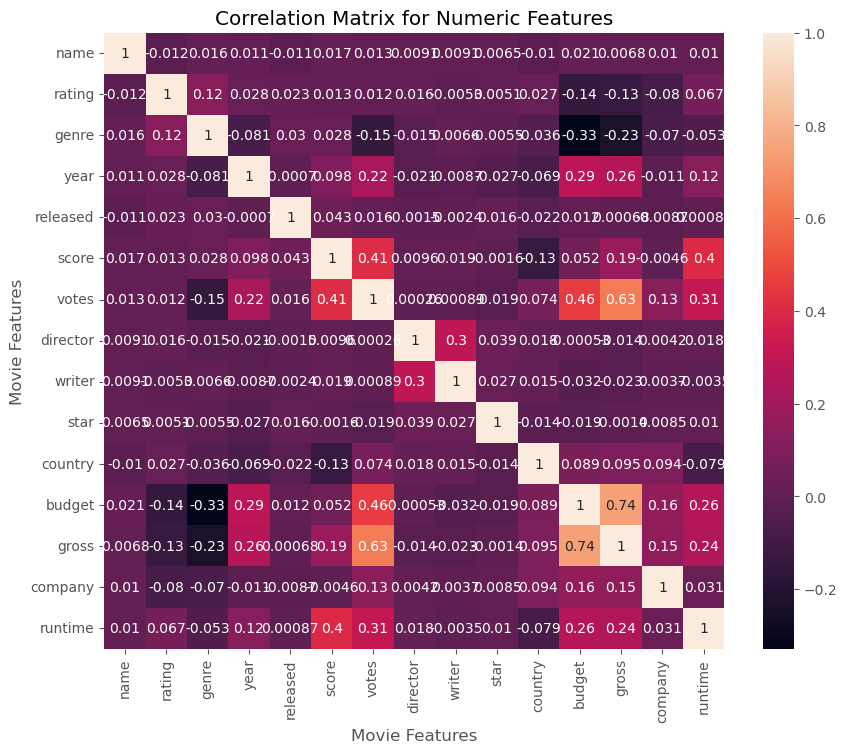

In [178]:
correlation_matrix=df_numerised.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [181]:
pd.set_option('display.max_rows', None)

In [182]:
correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.012441
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010425
          budget      0.020906
          gross       0.006774
          company     0.010369
          runtime     0.010390
rating    name       -0.012441
          rating      1.000000
          genre       0.123465
          year        0.027931
          released    0.023466
          score       0.013247
          votes       0.012379
          director    0.016255
          writer     -0.005289
          star        0.005092
          country     0.026930
          budget     -0.142811
          gross      -0.130490
          company    -0.079626
          runtime     0.066641
genre     name        0.016355
          rating      0.123465
        

In [185]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.744858
budget    gross       0.744858
votes     gross       0.632123
gross     votes       0.632123
votes     budget      0.458777
budget    votes       0.458777
votes     score       0.409182
score     votes       0.409182
          runtime     0.399378
runtime   score       0.399378
          votes       0.309204
votes     runtime     0.309204
director  writer      0.299067
writer    director    0.299067
year      budget      0.286476
budget    year        0.286476
          runtime     0.262437
runtime 

In [186]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.744858
budget    gross       0.744858
votes     gross       0.632123
gross     votes       0.632123
dtype: float64

## Budget and votes have the highest correlation to gross